In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [44]:
df1 = pd.read_csv('Final F-14 and Inject,2nd well.csv',index_col=0,parse_dates=True)
df = pd.read_csv('Final PF-12 and Injection.csv',index_col=0,parse_dates=True)

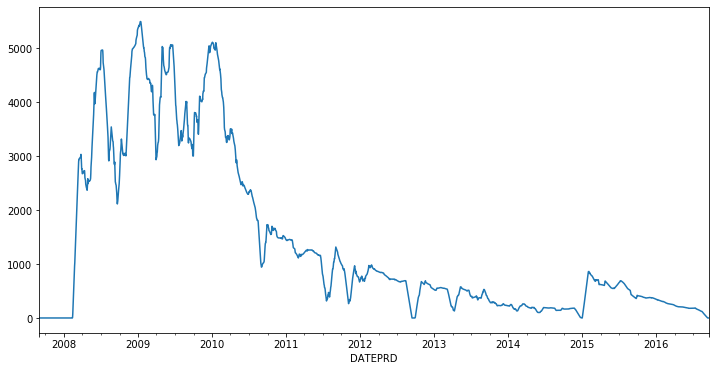

In [45]:
df['BORE_OIL_VOL'].rolling('30D').mean().plot(figsize=(12,6))

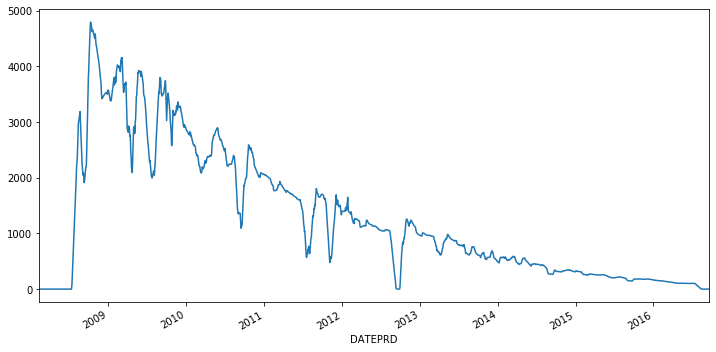

In [46]:
df1['BORE_OIL_VOL'].rolling('30D').mean().plot(figsize=(12,6))

In [47]:
a = df.rolling('30D').mean()
b = df1.rolling('30D').mean()

In [48]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_PRESSURE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_TEMPERATURE','NPD_WELL_BORE_CODE','Water Injection F-4', 'Injection Hours F-5','Injection Hours F-4','Water Injection F-5']
df= df.drop(to_drop,axis = 1)
df1 = df1.drop(to_drop,axis = 1)

In [49]:
df_train = df1.iloc[250:2500, :]
df_test = df.iloc[820:2000, :]

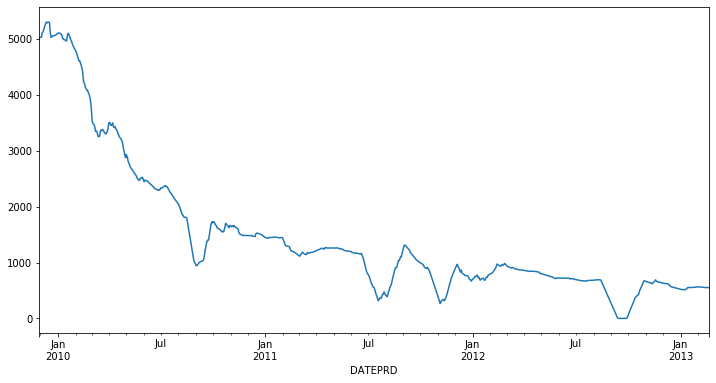

In [50]:
df.iloc[820:2000, :]['BORE_OIL_VOL'].rolling('30D').mean().plot(figsize=(12,6))

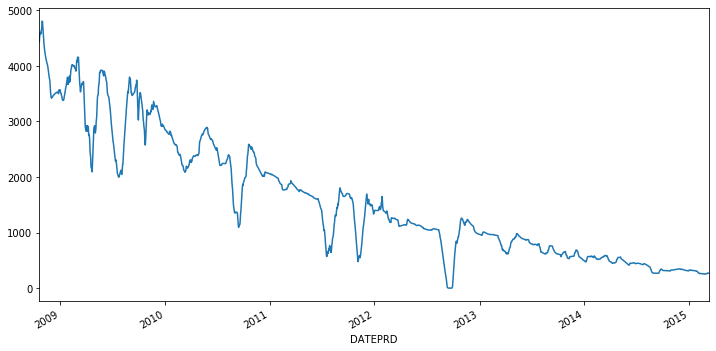

In [51]:
df1.iloc[250:2500, :]['BORE_OIL_VOL'].rolling('30D').mean().plot(figsize=(12,6))


In [52]:
df_train.shape , df_test.shape

((2250, 10), (1180, 10))

In [53]:
train_labels = df_train.pop('BORE_OIL_VOL')
test_labels = df_test.pop('BORE_OIL_VOL')

In [54]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,2250.0,21.849809,5.994577,0.000,24.000000,24.000000,24.00000,25.000
AVG_DP_TUBING,2250.0,198.739880,30.838971,0.000,184.043250,202.549500,216.82250,302.110
AVG_ANNULUS_PRESS,2250.0,16.955382,4.977490,0.000,11.756000,18.756000,20.94900,26.682
AVG_CHOKE_SIZE_P,2250.0,67.296909,30.487615,0.000,42.235017,65.228585,100.00000,100.000
AVG_WHP_P,2250.0,46.207070,20.702756,0.000,32.361750,39.005500,55.53450,125.719
AVG_WHT_P,2250.0,82.596654,16.038199,0.992,84.401250,87.098500,88.86375,93.510
DP_CHOKE_SIZE,2250.0,16.782044,20.723567,0.063,3.149500,9.019000,22.92525,125.719
BORE_WAT_VOL,2250.0,2492.762667,1399.537905,-59.000,1510.500000,3036.000000,3548.75000,5692.000
Total Water Injection,2250.0,10798.080444,4136.852958,0.000,8923.750000,11696.000000,13057.25000,18020.000


In [55]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)

In [57]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [58]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [60]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape=[len(df_train.keys())]),
        layers.Dense(64,activation = tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae','mse'])
    
    return model

In [63]:
volve = pd.read_csv('vpd.csv')

In [107]:
well5 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'
df = volve[well5].reset_index().drop('index',axis = 1)


Text(0.5, 1, 'Well Bore Name = 15/9-F-1 C(Well 5)')

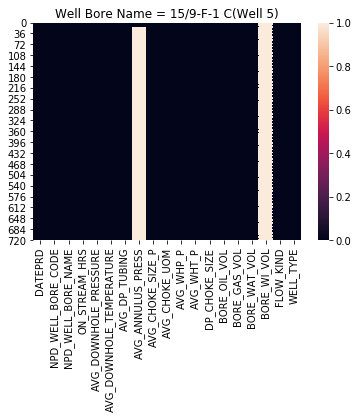

In [108]:
sns.heatmap(df.isnull())
plt.title('Well Bore Name = 15/9-F-1 C(Well 5)')

In [112]:
df

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,%,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,17-Apr-16,7405,15/9-F-1 C,0.0,270.268,101.198,263.770,NaN,0.00000,%,6.498,9.802,2.645,0.0,0.0,0.0,NaN,production,OP
742,18-Apr-16,7405,15/9-F-1 C,0.0,276.869,101.231,263.155,NaN,0.00000,%,13.714,11.742,4.120,0.0,0.0,0.0,NaN,production,OP
743,19-Apr-16,7405,15/9-F-1 C,0.0,282.105,101.178,273.530,NaN,0.26519,%,8.576,10.119,1.866,0.0,0.0,0.0,NaN,production,OP
744,20-Apr-16,7405,15/9-F-1 C,0.0,285.096,101.131,266.816,NaN,0.00000,%,18.280,9.872,7.414,0.0,0.0,0.0,NaN,production,OP


In [119]:
df = df.fillna(0)

In [120]:
df.isna().sum()

DATEPRD                     0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
BORE_WI_VOL                 0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64

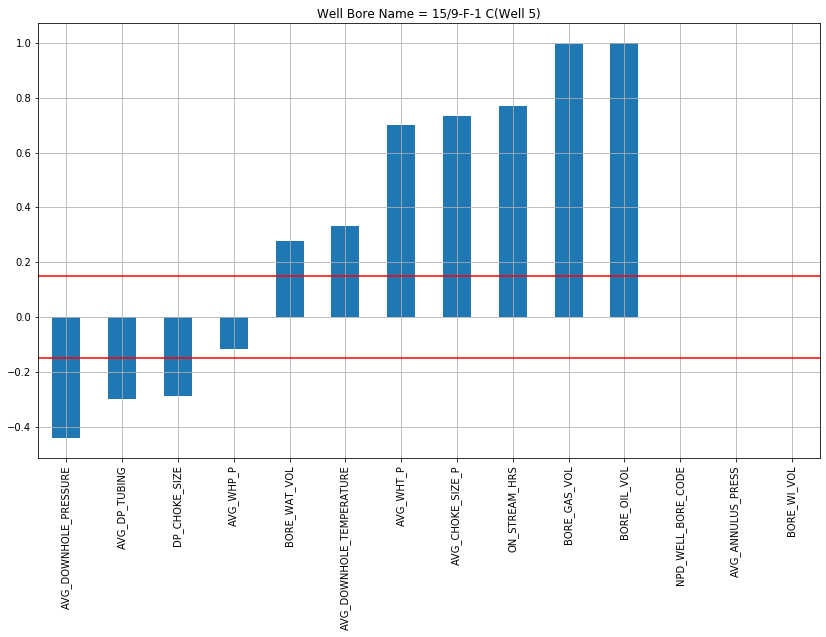

In [121]:
plt.figure(figsize=(14,8))
df.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-1 C(Well 5)')
plt.grid(True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015573CD5648>,
      dtype=object)

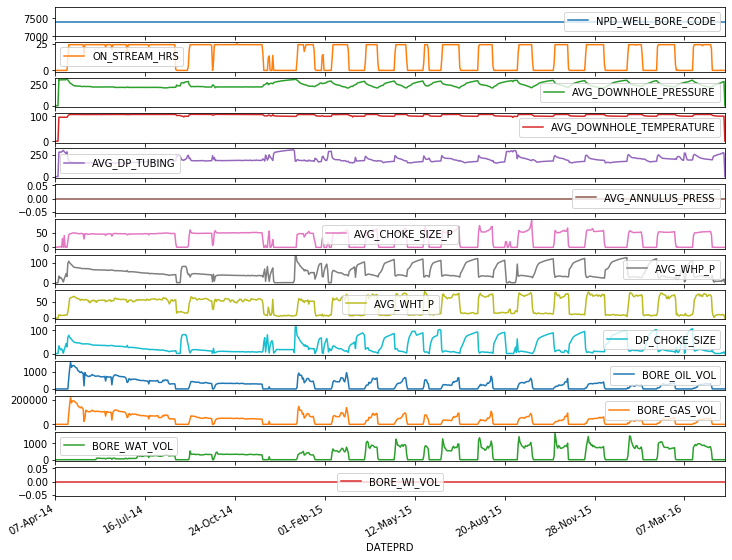

In [122]:
df.index = df_well5['DATEPRD']
df.plot(figsize = (12,10),subplots = True)

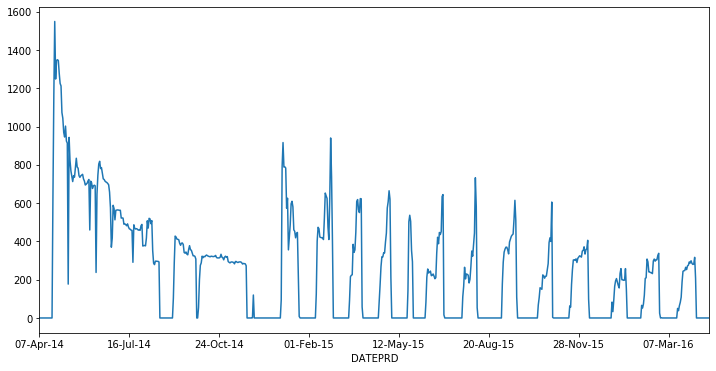

In [123]:
df['BORE_OIL_VOL'].plot(figsize=(12,6))

In [124]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [125]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE','NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME','BORE_OIL_VOL','AVG_ANNULUS_PRESS']


In [126]:
X = df.drop(to_drop,axis = 1)
Y = df['BORE_OIL_VOL']

In [127]:
X.columns

Index(['DATEPRD', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND',
       'WELL_TYPE'],
      dtype='object')

In [128]:
X = X.drop('AVG_CHOKE_UOM',axis = 1)

In [129]:
X = X.drop(['BORE_WI_VOL', 'FLOW_KIND','WELL_TYPE'],axis = 1)

In [130]:
X.columns

Index(['DATEPRD', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_WAT_VOL'],
      dtype='object')

In [131]:
X = X.drop('DATEPRD',axis = 1)

In [132]:
X

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
DATEPRD,,,,,,,,
07-Apr-14,0.0,0.000,0.000,0.00000,0.000,0.000,0.000,0.0
08-Apr-14,0.0,0.000,0.000,1.00306,0.000,0.000,0.000,0.0
09-Apr-14,0.0,0.000,0.000,0.97901,0.000,0.000,0.000,0.0
10-Apr-14,0.0,0.000,0.000,0.54576,0.000,0.000,0.000,0.0
11-Apr-14,0.0,310.376,277.278,1.21599,33.098,10.480,33.072,0.0
...,...,...,...,...,...,...,...,...
17-Apr-16,0.0,270.268,263.770,0.00000,6.498,9.802,2.645,0.0
18-Apr-16,0.0,276.869,263.155,0.00000,13.714,11.742,4.120,0.0
19-Apr-16,0.0,282.105,273.530,0.26519,8.576,10.119,1.866,0.0


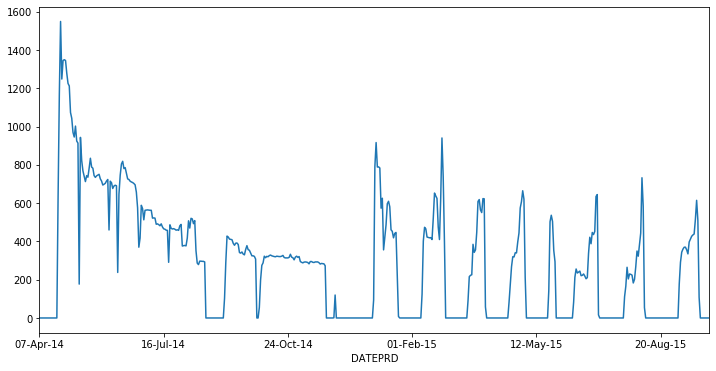

In [133]:
df.iloc[:540]['BORE_OIL_VOL'].plot(figsize=(12,6))

In [134]:
X_train = X.iloc[0:540,:]
X_test = X.iloc[540:,:]

In [135]:
y_train = Y.iloc[0:540]
y_test = Y.iloc[540:]

In [136]:
from sklearn.ensemble import RandomForestRegressor


In [158]:
regressor = RandomForestRegressor(n_estimators=115)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=115,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [159]:
regressor.score(X_test,y_test)

0.8308992647823721

In [160]:
y_predict = regressor.predict(X_test)

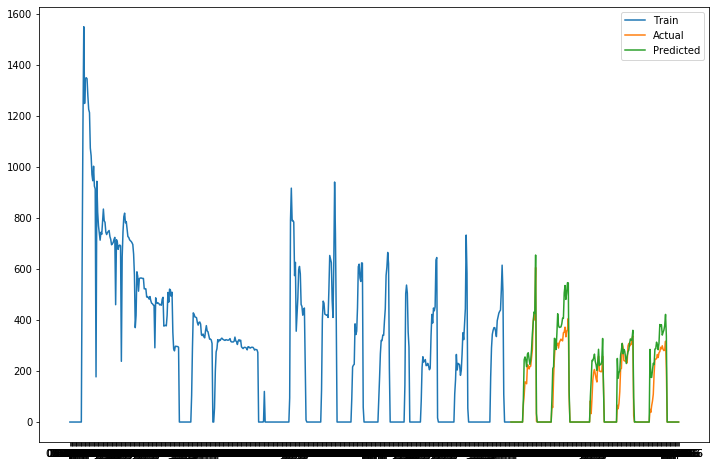

In [163]:
plt.figure(figsize=(12,8))
plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predict,label = 'Predicted')
plt.legend()

## 15D

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
volve = pd.read_csv('vpd.csv')

In [5]:
well4 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-15 D'
df_well4 = volve[well4].reset_index().drop('index',axis = 1)
print(df_well4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 19 columns):
DATEPRD                     978 non-null object
NPD_WELL_BORE_CODE          978 non-null int64
NPD_WELL_BORE_NAME          978 non-null object
ON_STREAM_HRS               978 non-null float64
AVG_DOWNHOLE_PRESSURE       978 non-null float64
AVG_DOWNHOLE_TEMPERATURE    978 non-null float64
AVG_DP_TUBING               978 non-null float64
AVG_ANNULUS_PRESS           978 non-null float64
AVG_CHOKE_SIZE_P            978 non-null float64
AVG_CHOKE_UOM               978 non-null object
AVG_WHP_P                   978 non-null float64
AVG_WHT_P                   978 non-null float64
DP_CHOKE_SIZE               978 non-null float64
BORE_OIL_VOL                978 non-null float64
BORE_GAS_VOL                978 non-null float64
BORE_WAT_VOL                978 non-null float64
BORE_WI_VOL                 0 non-null float64
FLOW_KIND                   978 non-null object
WELL_TYPE            

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B76104508>,
      dtype=object)

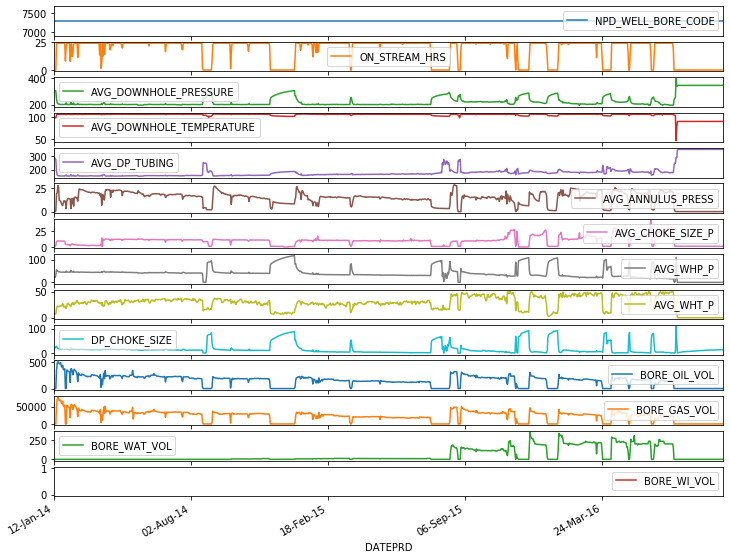

In [7]:
df_well4.index = df_well4['DATEPRD']
df_well4.plot(figsize = (12,10),subplots = True)

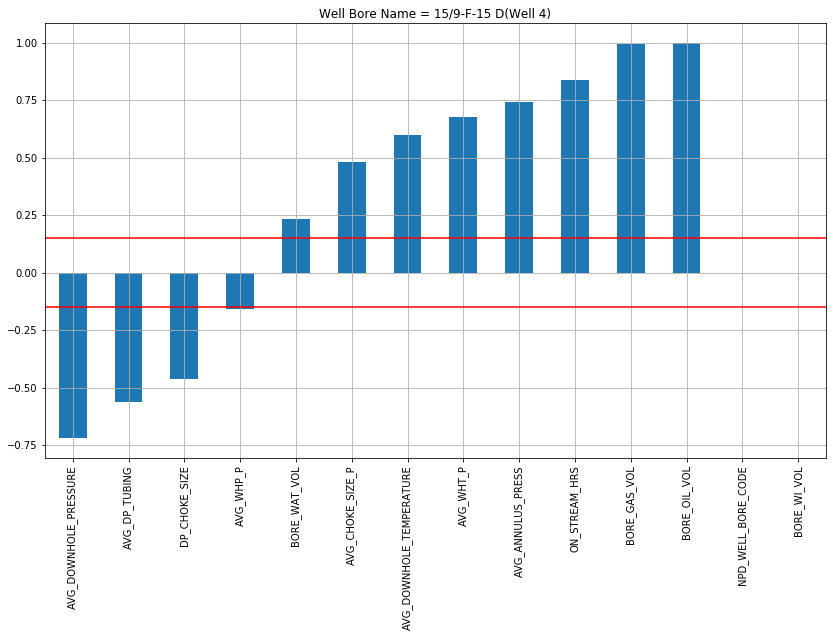

In [8]:
plt.figure(figsize=(14,8))
df_well4.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-15 D(Well 4)')
plt.grid(True)

In [11]:
#df_well4.to_csv('Well F-15 D.csv')

In [21]:
df15d = pd.read_csv('PF-15 D.csv',index_col=0,parse_dates=True)

In [22]:
df15d.columns

Index(['NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')

In [23]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE',
          'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME','BORE_OIL_VOL','BORE_WAT_VOL']

In [24]:
X = df15d.drop(to_drop,axis = 1)
Y = df15d['BORE_OIL_VOL']

In [26]:
X.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE'],
      dtype='object')

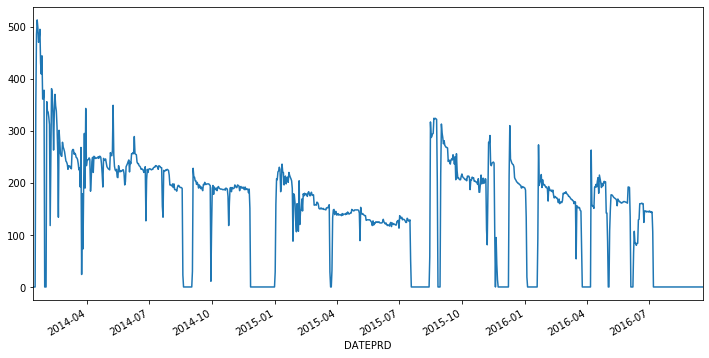

In [30]:
df15d['BORE_OIL_VOL'].plot(figsize=(12,6))

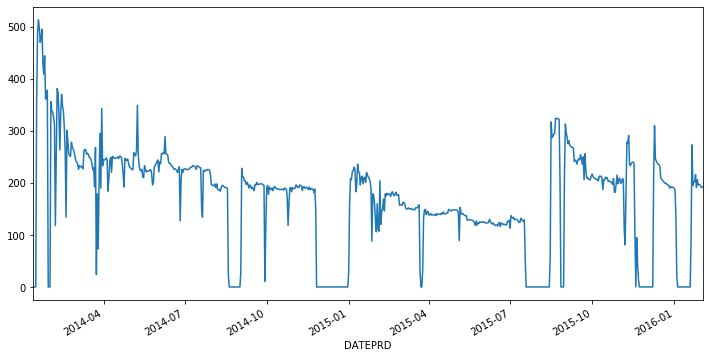

In [36]:
df15d.iloc[:750]['BORE_OIL_VOL'].plot(figsize=(12,6))

In [37]:
X_train = X.iloc[0:750,:]
X_test = X.iloc[750:,:]
y_train = Y.iloc[0:750]
y_test = Y.iloc[750:]

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
rf = RandomForestRegressor(n_estimators=200)
gb = GradientBoostingRegressor(n_estimators=150)

In [78]:
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [79]:
gb.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
rf.score(X_test,y_test)

0.7060058390871327

In [81]:
gb.score(X_test,y_test)

0.6804552382305012

In [82]:
y_predict_RF = rf.predict(X_test)
y_predict_GB = gb.predict(X_test)

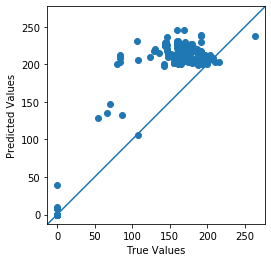

In [116]:
plt.scatter(y_test, y_predict_RF)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

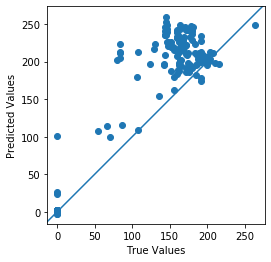

In [117]:
plt.scatter(y_test, y_predict_GB)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

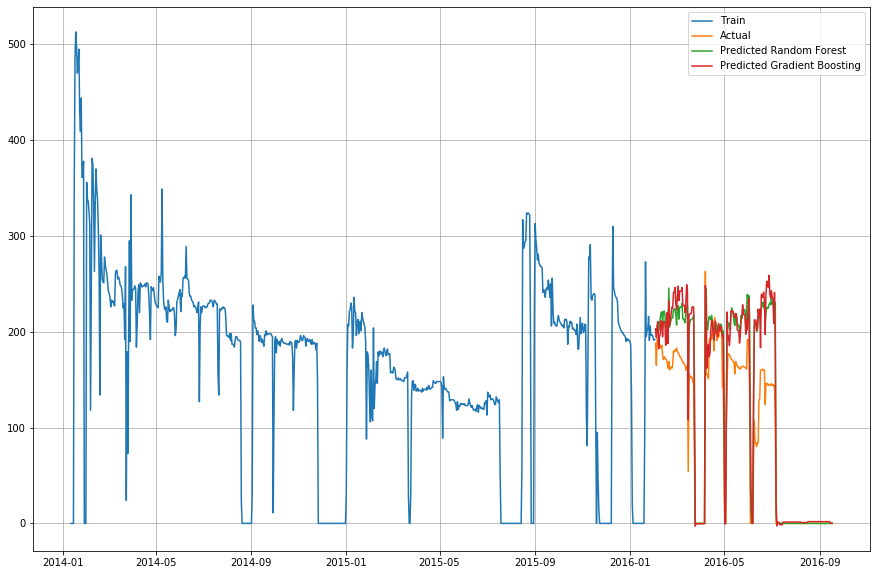

In [83]:
plt.figure(figsize=(15,10))
plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predict_RF,label = 'Predicted Random Forest')
plt.plot(X_test.index,y_predict_GB,label = 'Predicted Gradient Boosting')
plt.grid()
plt.legend()

In [84]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [85]:
to_drop =['NPD_WELL_BORE_CODE',"BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE','BORE_WAT_VOL', 'NPD_WELL_BORE_NAME']
df1cnn= df15d.drop(to_drop,axis = 1)
df1cnn.head()


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
DATEPRD,,,,,,,,,
2014-01-12,0.0,303.747,283.535,0.000,1.18175,20.212,8.396,20.146,0
2014-01-13,0.0,303.955,280.695,0.000,1.19706,23.260,6.328,23.189,0
2014-01-14,0.0,303.377,282.030,0.000,1.12514,21.347,6.830,21.275,0
2014-01-15,0.0,304.405,272.530,0.586,2.61021,31.875,7.687,27.094,0
2014-01-16,24.0,241.771,185.900,19.057,8.66059,55.871,16.900,27.966,351


In [86]:
df_train = df1cnn.iloc[:750, :]
df_test = df1cnn.iloc[750: , :]

In [87]:
df_train.shape , df_test.shape

((750, 9), (228, 9))

In [88]:
train_labels = df_train.pop('BORE_OIL_VOL')
test_labels = df_test.pop('BORE_OIL_VOL')

In [89]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,750.0,19.507413,8.928609,0.000,24.000000,24.000000,24.00000,24.00000
AVG_DOWNHOLE_PRESSURE,750.0,216.966103,28.639623,195.025,199.970000,200.605000,220.27900,305.91600
AVG_DP_TUBING,750.0,171.119264,19.777382,153.683,158.265750,166.584500,178.17900,283.53500
AVG_ANNULUS_PRESS,750.0,14.535456,5.732674,0.000,12.509000,15.349500,18.07800,28.48800
AVG_CHOKE_SIZE_P,750.0,9.299064,5.070180,0.000,8.394605,10.401675,11.56432,28.09178
AVG_WHP_P,750.0,45.846857,21.820791,0.013,33.430000,41.005500,45.06175,118.12700
AVG_WHT_P,750.0,28.816131,9.651534,2.710,25.102000,29.495000,34.40725,51.25200
DP_CHOKE_SIZE,750.0,18.800467,22.435128,0.010,5.468250,12.490500,15.97650,93.33000


In [90]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)

In [91]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape=[len(df_train.keys())]),
        layers.Dense(64,activation = tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae','mse'])
    return model

In [92]:
model = build_model()

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [94]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 ==0: print("")
    print('.',end = '')
EPOCHS = 1000
history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [95]:
hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,292.966173,10.766333,292.966187,6994.345781,63.773510,6994.345703,995
996,300.294828,10.800558,300.294830,7678.655391,68.644730,7678.654785,996
997,289.378975,10.803179,289.378998,7532.920495,69.069931,7532.920898,997
998,284.756718,10.635272,284.756714,7522.275508,67.238884,7522.275879,998
999,294.086200,10.899674,294.086212,8277.332305,73.504189,8277.332031,999


In [96]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error[OIL]')
  plt.plot(hist['epoch'],hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.grid()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [ OIL]')
  plt.plot(hist['epoch'],hist['mse'],label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label = 'Val Error')
  plt.legend()
  plt.grid()

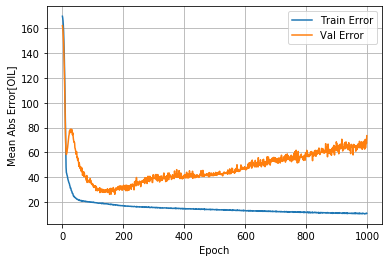

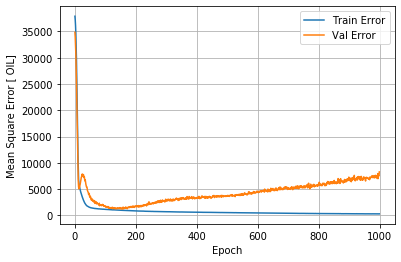

In [97]:
plot_history(history)

In [98]:
loss, mae , mse = model.evaluate(normed_test_data, test_labels, verbose = 0)
print('Mean Absolute Error', mae)
print('Mean Square Error', mse)

Mean Absolute Error 120.02992
Mean Square Error 23961.3


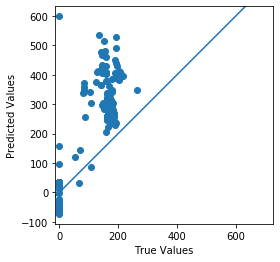

In [99]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

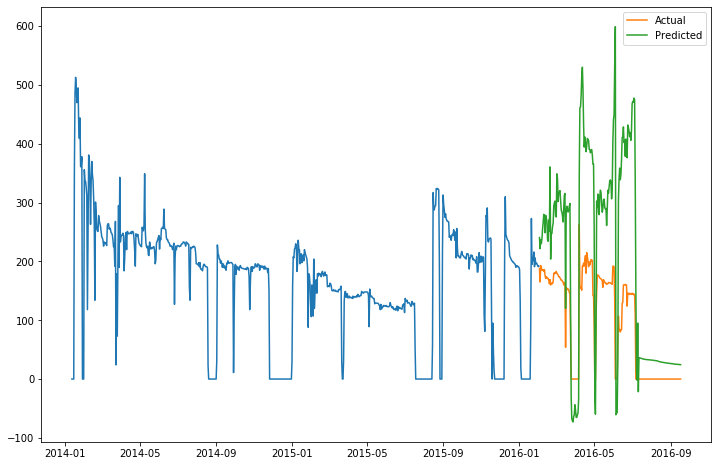

In [100]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,train_labels)
plt.plot(df_test.index,test_labels,label= 'Actual')
plt.plot(df_test.index,test_predictions,label = 'Predicted')
plt.legend()


....................................................................................................
....................................................................................................
.....................................................................

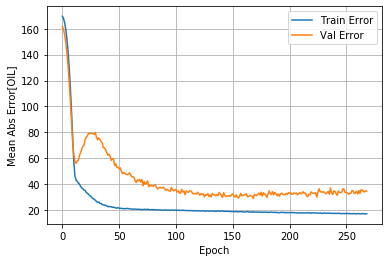

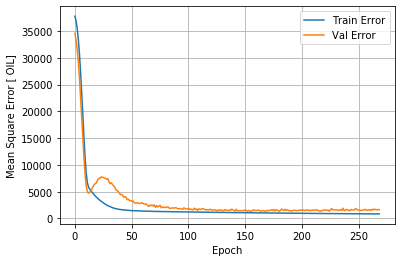

In [105]:
model = build_model()
#Patience is for checking the amount of epochs for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 100)

history = model.fit(normed_train_data, train_labels, epochs = EPOCHS, validation_split=0.2, verbose=0,callbacks=[early_stop,PrintDot()])
plot_history(history)

In [106]:
loss, mae , mse = model.evaluate(normed_test_data, test_labels, verbose = 0)
print('Mean Absolute Error', mae)

Mean Absolute Error 83.930824


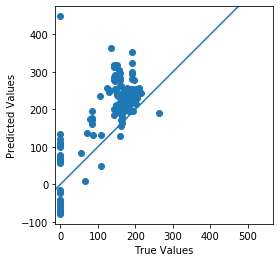

In [107]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

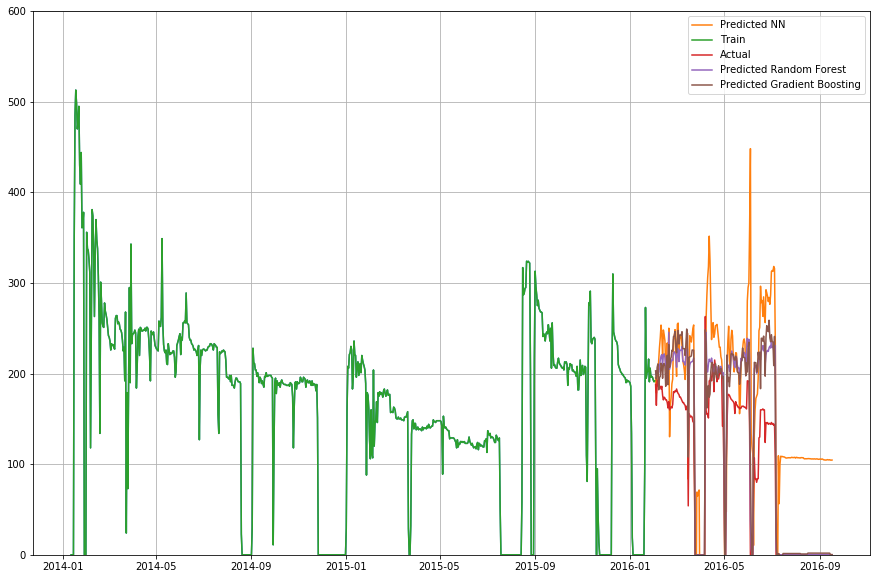

In [118]:
plt.figure(figsize=(15,10))
plt.plot(df_train.index,train_labels)
plt.plot(df_test.index,test_predictions,label = 'Predicted NN')


plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predict_RF,label = 'Predicted Random Forest')
plt.plot(X_test.index,y_predict_GB,label = 'Predicted Gradient Boosting')
plt.ylim(0,600)
plt.grid()
plt.legend()